In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df1 = pd.read_csv('data/냉간단조_데이터셋_unique1_drop.csv')

In [6]:
# 예: METAL_TEMP_CONTROL에서 감소하거나 유지된 구간 추출
diff_vals = df1['METAL_TEMP_CONTROL'].diff()

# 조건: diff 결과가 0 이하인 행
mask = diff_vals < 0

# 해당 조건을 만족하는 원래 행 추출
decreasing_or_flat = df1[mask]

In [13]:
decreasing_or_flat[
    (decreasing_or_flat['Timestamp'] > '2022-05-04 06:33:20') &
    (decreasing_or_flat['Timestamp'] < '2022-05-05 16:59:23')
]['Timestamp']

127081    2022-05-04 06:49:12 
128953    2022-05-04 07:20:32 
128959    2022-05-04 07:20:38 
128969    2022-05-04 07:20:48 
130588    2022-05-04 07:47:52 
                  ...         
195060    2022-05-05 01:46:38 
195066    2022-05-05 01:46:44 
195086    2022-05-05 01:47:04 
195106    2022-05-05 01:47:24 
195224    2022-05-05 01:49:22 
Name: Timestamp, Length: 125, dtype: object

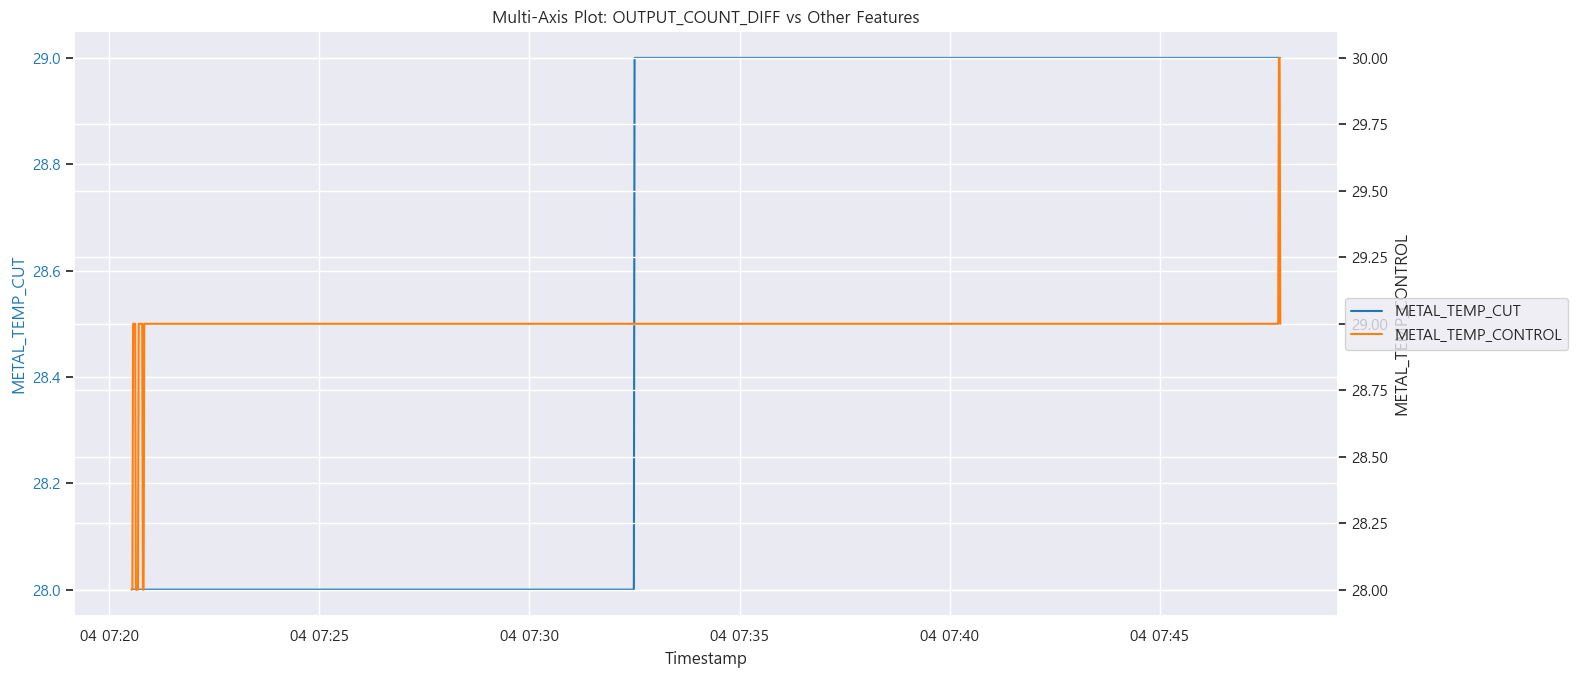

In [15]:
# ✅ 1. 사용할 컬럼 리스트 정의
left_y_cols = ['METAL_TEMP_CUT']
right_y_cols = [ 'METAL_TEMP_CONTROL']  # 여기에 추가 컬럼 적기

# ✅ 2. Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-04 07:20:32  '
end_date = '2022-05-04 07:47:52 '
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 3. 이중 y축 그래프 시작
fig, ax1 = plt.subplots(figsize=(16, 7))

# 왼쪽 y축 (단일 컬럼)
color_left = 'tab:blue'
ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_cols[0]], color=color_left, label=left_y_cols[0])
ax1.set_xlabel('Timestamp')
ax1.set_ylabel(left_y_cols[0], color=color_left)
ax1.tick_params(axis='y', labelcolor=color_left)
ax1.grid(True)

# 오른쪽 y축 (다중 컬럼)
ax2 = ax1.twinx()

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']  # 필요시 색 추가
for i, col in enumerate(right_y_cols):
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], label=col, color=colors_right[i % len(colors_right)])

ax2.set_ylabel(' / '.join(right_y_cols))
ax2.tick_params(axis='y')

# ✅ 4. 범례 통합
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1, 0.5))

# ✅ 5. 스타일 마무리
plt.title('Multi-Axis Plot: OUTPUT_COUNT_DIFF vs Other Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# 예: METAL_TEMP_CONTROL에서 감소하거나 유지된 구간 추출
diff_vals = df1['METAL_TEMP_CUT'].diff()

# 조건: diff 결과가 0 이하인 행
mask = diff_vals < 0

# 해당 조건을 만족하는 원래 행 추출
decreasing_or_flat = df1[mask]

In [18]:
decreasing_or_flat[
    (decreasing_or_flat['Timestamp'] > '2022-05-04 06:33:20') &
    (decreasing_or_flat['Timestamp'] < '2022-05-04 09:00:00')
]['Timestamp']

127147   2022-05-04 06:50:18
127711   2022-05-04 06:59:42
128555   2022-05-04 07:13:54
128571   2022-05-04 07:14:10
130878   2022-05-04 07:52:46
132188   2022-05-04 08:14:36
133022   2022-05-04 08:28:30
133032   2022-05-04 08:28:40
133036   2022-05-04 08:28:44
133658   2022-05-04 08:39:06
133662   2022-05-04 08:39:10
133830   2022-05-04 08:42:02
134764   2022-05-04 08:57:44
134772   2022-05-04 08:57:52
Name: Timestamp, dtype: datetime64[ns]

### metal temp control 파생변수

In [20]:
time_ranges = [
    ('2022-05-04 08:02:10', '2022-05-04 08:10:59'),
    ('2022-05-04 12:18:04', '2022-05-04 13:01:27'),
    ('2022-05-04 21:28:30', '2022-05-04 22:10:07'),
    ('2022-05-05 21:08:26', '2022-05-05 22:04:11'),
    ('2022-05-06 10:03:26', '2022-05-06 10:30:15'),
    ('2022-05-06 12:53:16', '2022-05-06 12:56:53'),
    ('2022-05-06 14:26:04', '2022-05-06 14:32:37'),
    ('2022-05-06 21:54:08', '2022-05-06 22:00:27'),
    ('2022-05-09 09:12:38', '2022-05-09 09:40:39'),
    ('2022-05-09 12:24:28', '2022-05-09 12:59:13'),
    ('2022-05-09 05:03:24', '2022-05-09 05:40:45'),
    ('2022-05-10 12:37:28', '2022-05-10 12:58:41'),
    ('2022-05-10 13:28:13', '2022-05-10 13:52:21'),
    ('2022-05-10 13:55:50', '2022-05-10 14:37:15'),
    ('2022-05-10 18:00:13', '2022-05-10 18:19:00'),
    ('2022-05-11 07:39:10', '2022-05-11 07:48:27'),
    ('2022-05-11 09:39:34', '2022-05-11 09:46:50'),
    ('2022-05-11 12:46:16', '2022-05-11 13:52:45'),
    ('2022-05-11 17:13:07', '2022-05-11 18:31:10'),
    ('2022-05-12 08:23:59', '2022-05-12 08:45:14'),
    ('2022-05-12 12:06:11', '2022-05-12 13:09:56'),
    ('2022-05-12 13:45:40', '2022-05-12 14:57:59'),
    ('2022-05-12 21:59:45', '2022-05-12 22:08:24'),
    ('2022-05-13 11:46:52', '2022-05-13 13:16:46'),
    ('2022-05-13 21:09:45', '2022-05-13 21:52:30')
]

In [32]:
# Timestamp 컬럼이 datetime 형식인지 확인
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# 기본값: 정상
df1['METAL_TEMP_CONTROL_PHASE'] = '정상'

# 각 구간마다 감소구간으로 설정
for start, end in time_ranges:
    mask = (df1['Timestamp'] >= start) & (df1['Timestamp'] <= end)
    df1.loc[mask, 'METAL_TEMP_CONTROL_PHASE'] = '감소구간'

In [33]:
df1['METAL_TEMP_CONTROL_PHASE'].value_counts()

METAL_TEMP_CONTROL_PHASE
정상      538601
감소구간     40696
Name: count, dtype: int64

### metal temp cut 파생변수

In [25]:
time_ranges = [
    ('2022-05-04 07:52:46', '2022-05-04 08:14:37'),
    ('2022-05-04 12:13:56', '2022-05-04 13:05:51'),
    ('2022-05-04 21:26:38', '2022-05-04 22:10:25'),
    ('2022-05-04 23:21:26', '2022-05-04 23:22:11'),
    ('2022-05-05 21:14:24', '2022-05-05 22:04:53'),
    ('2022-05-06 10:10:58', '2022-05-06 10:18:15'),
    ('2022-05-06 12:47:12', '2022-05-06 12:57:31'),
    ('2022-05-06 14:23:52', '2022-05-06 14:31:57'),
    ('2022-05-06 21:47:41', '2022-05-06 22:01:18'),
    ('2022-05-09 09:17:56', '2022-05-09 09:41:25'),
    ('2022-05-09 12:29:34', '2022-05-09 13:00:31'),
    ('2022-05-09 17:22:48', '2022-05-09 17:29:19'),
    ('2022-05-09 18:16:12', '2022-05-09 18:20:27'),
    ('2022-05-10 12:19:26', '2022-05-10 13:04:09'),
    ('2022-05-10 13:28:13', '2022-05-10 13:36:05'),
    ('2022-05-10 14:04:40', '2022-05-10 14:29:51'),
    ('2022-05-10 17:55:58', '2022-05-10 18:19:41'),
    ('2022-05-11 07:33:27', '2022-05-11 07:53:31'),
    ('2022-05-11 09:37:35', '2022-05-11 09:47:10'),
    ('2022-05-11 13:08:54', '2022-05-11 13:52:01'),
    ('2022-05-11 18:08:00', '2022-05-11 18:10:52'),
    ('2022-05-12 08:22:36', '2022-05-12 08:47:17'),
    ('2022-05-12 12:38:15', '2022-05-12 13:01:04'),
    ('2022-05-12 13:58:35', '2022-05-12 14:51:52'),
    ('2022-05-12 21:50:49', '2022-05-12 22:09:32'),
    ('2022-05-13 12:05:02', '2022-05-13 13:14:22'),
    ('2022-05-13 21:09:10', '2022-05-13 21:56:23')
]

In [34]:
# Timestamp가 datetime인지 확인
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# 초기값은 '정상'
df1['METAL_TEMP_CUT_PHASE'] = '정상'

# 각 구간에 해당하면 '감소구간'으로 설정
for start, end in time_ranges:
    mask = (df1['Timestamp'] >= start) & (df1['Timestamp'] <= end)
    df1.loc[mask, 'METAL_TEMP_CUT_PHASE'] = '감소구간'

In [35]:
# 각 범주 개수 확인
df1['METAL_TEMP_CUT_PHASE'].value_counts()

METAL_TEMP_CUT_PHASE
정상      538601
감소구간     40696
Name: count, dtype: int64